In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense ,Flatten,Input

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [67]:
in_layer=Input(shape=(28,28))
inputs=Flatten()(in_layer)
D1=Dense(100,activation="sigmoid",name="L1")(inputs)
D2=Dense(50,activation="sigmoid",name="L2")(D1)
D3=Dense(30,activation="sigmoid",name="L3")(D2)
out=Dense(10,activation="softmax",name="output")(D3)
model=Model(inputs=in_layer,outputs=out)

In [68]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
L1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 30)                1530      
_________________________________________________________________
output (Dense)               (None, 10)                310       
Total params: 85,390
Trainable params: 85,390
Non-trainable params: 0
_______________________________________________________

In [69]:
from tensorflow.keras.datasets import mnist

In [70]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [71]:
x_train.shape

(60000, 28, 28)

In [72]:
model.compile(optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [73]:
y_train_hot=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()

In [74]:
output=model.fit(x_train,y_train_hot,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.8355 - accuracy: 0.7896
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4094 - accuracy: 0.8788
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3677 - accuracy: 0.8889
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3308 - accuracy: 0.8989
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3207 - accuracy: 0.9013
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2988 - accuracy: 0.9075s - los
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2675 - accuracy: 0.9176
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2610 - accuracy: 0.9188
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2623 - accuracy: 0.9188
Epoch 1

In [75]:
y_test_hot=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [76]:
model.evaluate(x_test,y_test_hot,verbose=0)

[0.25871413292884826, 0.9194]

(0, 1)

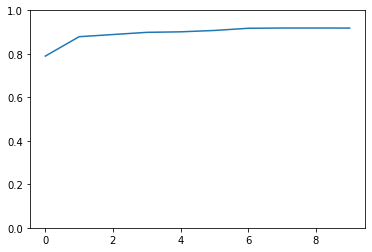

In [77]:
plt.plot(output.history["accuracy"])
plt.ylim(0,1)

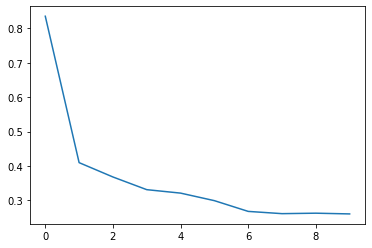

In [78]:
plt.plot(output.history["loss"])